<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colnames=['Surgery', 'Age', 'Hospital Number', 'Rectal temperature', 'Pulse', 'Respiratory rate',
         'Temperature of extremities', 'Peripheral pulse', 'Mucous membranes', 'Capillary refill time', 'Pain',
          'Peristalsis', 'Abdominal distension', 'Nasogastric tube', 'Nasogastric reflux', 'Nasogastric reflux PH',
          'Rectal examination', 'Abdomen', 'Packed cell volume', 'Total protein', 'Abdominocentesis appearance', 
          'Abdomcentesis total protein', 'Outcome', 'Surgical lesion', 'Type of lesion 1', 'Type of lesion 2',
          'Type of lesion 3', 'Cp_data', '',] 
horse_colic_df = pd.read_csv('horse_data.csv', names=colnames, header=None)
horse_colic_df.head()

,Surgery,Age,Hospital Number,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Peripheral pulse,Mucous membranes,Capillary refill time,...,Total protein,Abdominocentesis appearance,Abdomcentesis total protein,Outcome,Surgical lesion,Type of lesion 1,Type of lesion 2,Type of lesion 3,Cp_data,
0,2,1,530101,38.50,66,28,3,3,?,2,...,8.40,?,?,2,2,11300,0,0,2,NaN
1,1,1,534817,39.2,88,20,?,?,4,1,...,85,2,2,3,2,2208,0,0,2,NaN
2,2,1,530334,38.30,40,24,1,1,3,1,...,6.70,?,?,1,2,0,0,0,1,NaN
3,1,9,5290409,39.10,164,84,4,1,6,2,...,7.20,3,5.30,2,1,2208,0,0,1,NaN
4,2,1,530255,37.30,104,35,?,?,6,2,...,7.40,?,?,2,2,4300,0,0,2,NaN


In [3]:
horse_colic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Surgery                      300 non-null    object 
 1   Age                          300 non-null    int64  
 2   Hospital Number              300 non-null    int64  
 3   Rectal temperature           300 non-null    object 
 4   Pulse                        300 non-null    object 
 5   Respiratory rate             300 non-null    object 
 6   Temperature of extremities   300 non-null    object 
 7   Peripheral pulse             300 non-null    object 
 8   Mucous membranes             300 non-null    object 
 9   Capillary refill time        300 non-null    object 
 10  Pain                         300 non-null    object 
 11  Peristalsis                  300 non-null    object 
 12  Abdominal distension         300 non-null    object 
 13  Nasogastric tube    

Так, ну будем разбираться с этими грешными коликами у лошадей. Для начала, переименовали файл, как положено, однако, сходу возникла проблема. И не одна. 
В описании имен сказано: 24, 25, 26 type of lesion. Ладно, но откуда там тогда в расшифровке ЧЕТЫРЕ параметра а не три  
first number is site of lesion  
second number is type  
third number is subtype  
fourth number is specific code    
???  
Затем, последний столбец из одних нанов это вообще непонятно что.   
В 1 столбце возраст должен кодироваться 1 и 2, вместо этого он кодируется 1 и 9???

In [4]:
# Ладно, начнем разгребать этот бардак. Снесем непонятный 28 столбец, поменяем местами кое-что для большей логичности и 
# изменим значения на явные и информативные
horse_colic_df = horse_colic_df.drop(horse_colic_df.columns[[28]], axis='columns')

In [5]:
neworder = ['Hospital Number', 'Age', 'Surgery', 'Rectal temperature', 'Pulse', 'Respiratory rate', 'Nasogastric reflux PH',
         'Temperature of extremities', 'Peripheral pulse', 'Mucous membranes', 'Capillary refill time', 'Pain',
          'Peristalsis', 'Abdominal distension', 'Nasogastric tube', 'Nasogastric reflux', 'Rectal examination',
            'Abdomen', 'Packed cell volume', 'Total protein', 'Abdominocentesis appearance', 
          'Abdomcentesis total protein', 'Outcome', 'Surgical lesion', 'Type of lesion 1', 'Type of lesion 2',
          'Type of lesion 3', 'Cp_data']
horse_colic_new_df = horse_colic_df.reindex(columns=neworder)

In [13]:
horse_colic_new_df['Surgery'] = horse_colic_new_df['Surgery'].mask((horse_colic_new_df['Surgery'] == '1'), 'Yes')
horse_colic_new_df['Surgery'] = horse_colic_new_df['Surgery'].mask((horse_colic_new_df['Surgery'] == '2'), 'No')

horse_colic_new_df['Age'] = np.where(horse_colic_new_df['Age'] == 1, 'Adult', horse_colic_new_df['Age'])
# Гениально - одно значение у них строка, а второе - число!!
horse_colic_new_df['Age'] = np.where(horse_colic_new_df['Age'] == '9', 'Young', horse_colic_new_df['Age'])


horse_colic_new_df['Temperature of extremities'] = horse_colic_new_df['Temperature of extremities'].mask((horse_colic_new_df['Temperature of extremities'] == '1'), 'Normal')
horse_colic_new_df['Temperature of extremities'] = horse_colic_new_df['Temperature of extremities'].mask((horse_colic_new_df['Temperature of extremities'] == '2'), 'Warm')
horse_colic_new_df['Temperature of extremities'] = horse_colic_new_df['Temperature of extremities'].mask((horse_colic_new_df['Temperature of extremities'] == '3'), 'Cool')
horse_colic_new_df['Temperature of extremities'] = horse_colic_new_df['Temperature of extremities'].mask((horse_colic_new_df['Temperature of extremities'] == '4'), 'Cold')

horse_colic_new_df['Peripheral pulse'] = horse_colic_new_df['Peripheral pulse'].mask((horse_colic_new_df['Peripheral pulse'] == '1'), 'Normal')
horse_colic_new_df['Peripheral pulse'] = horse_colic_new_df['Peripheral pulse'].mask((horse_colic_new_df['Peripheral pulse'] == '2'), 'Increased')
horse_colic_new_df['Peripheral pulse'] = horse_colic_new_df['Peripheral pulse'].mask((horse_colic_new_df['Peripheral pulse'] == '3'), 'Reduced')
horse_colic_new_df['Peripheral pulse'] = horse_colic_new_df['Peripheral pulse'].mask((horse_colic_new_df['Peripheral pulse'] == '4'), 'Absent')


horse_colic_new_df['Mucous membranes'] = horse_colic_new_df['Mucous membranes'].mask((horse_colic_new_df['Mucous membranes'] == '1'), 'Normal')
horse_colic_new_df['Mucous membranes'] = horse_colic_new_df['Mucous membranes'].mask((horse_colic_new_df['Mucous membranes'] == '2'), 'Normal')         
horse_colic_new_df['Mucous membranes'] = horse_colic_new_df['Mucous membranes'].mask((horse_colic_new_df['Mucous membranes'] == '3'), 'Pale pink')
horse_colic_new_df['Mucous membranes'] = horse_colic_new_df['Mucous membranes'].mask((horse_colic_new_df['Mucous membranes'] == '4'), 'Pale cyanotic')
horse_colic_new_df['Mucous membranes'] = horse_colic_new_df['Mucous membranes'].mask((horse_colic_new_df['Mucous membranes'] == '5'), 'Bright red/injected')
horse_colic_new_df['Mucous membranes'] = horse_colic_new_df['Mucous membranes'].mask((horse_colic_new_df['Mucous membranes'] == '6'), 'Dark cyanotic')

horse_colic_new_df['Capillary refill time'] = horse_colic_new_df['Capillary refill time'].mask((horse_colic_new_df['Capillary refill time'] == '1'), 'Normal')
horse_colic_new_df['Capillary refill time'] = horse_colic_new_df['Capillary refill time'].mask((horse_colic_new_df['Capillary refill time'] == '2'), 'Slow')

horse_colic_new_df['Pain'] = horse_colic_new_df['Pain'].mask((horse_colic_new_df['Pain'] == '1'), 'Normal')
horse_colic_new_df['Pain'] = horse_colic_new_df['Pain'].mask((horse_colic_new_df['Pain'] == '2'), 'Depressed')
horse_colic_new_df['Pain'] = horse_colic_new_df['Pain'].mask((horse_colic_new_df['Pain'] == '3'), 'Mild pain')
horse_colic_new_df['Pain'] = horse_colic_new_df['Pain'].mask((horse_colic_new_df['Pain'] == '4'), 'Severe pain')
horse_colic_new_df['Pain'] = horse_colic_new_df['Pain'].mask((horse_colic_new_df['Pain'] == '5'), 'Hell')

horse_colic_new_df['Peristalsis'] = horse_colic_new_df['Peristalsis'].mask((horse_colic_new_df['Peristalsis'] == '1'), 'Hypermotile')
horse_colic_new_df['Peristalsis'] = horse_colic_new_df['Peristalsis'].mask((horse_colic_new_df['Peristalsis'] == '2'), 'Normal')
horse_colic_new_df['Peristalsis'] = horse_colic_new_df['Peristalsis'].mask((horse_colic_new_df['Peristalsis'] == '3'), 'Hypomotile')
horse_colic_new_df['Peristalsis'] = horse_colic_new_df['Peristalsis'].mask((horse_colic_new_df['Peristalsis'] == '4'), 'Absent')

horse_colic_new_df['Abdominal distension'] = horse_colic_new_df['Abdominal distension'].mask((horse_colic_new_df['Abdominal distension'] == '1'), 'Normal')
horse_colic_new_df['Abdominal distension'] = horse_colic_new_df['Abdominal distension'].mask((horse_colic_new_df['Abdominal distension'] == '2'), 'Slight')
horse_colic_new_df['Abdominal distension'] = horse_colic_new_df['Abdominal distension'].mask((horse_colic_new_df['Abdominal distension'] == '3'), 'Moderate')
horse_colic_new_df['Abdominal distension'] = horse_colic_new_df['Abdominal distension'].mask((horse_colic_new_df['Abdominal distension'] == '4'), 'Severe')

horse_colic_new_df['Nasogastric tube'] = horse_colic_new_df['Nasogastric tube'].mask((horse_colic_new_df['Nasogastric tube'] == '1'), 'Normal')
horse_colic_new_df['Nasogastric tube'] = horse_colic_new_df['Nasogastric tube'].mask((horse_colic_new_df['Nasogastric tube'] == '2'), 'Slight')
horse_colic_new_df['Nasogastric tube'] = horse_colic_new_df['Nasogastric tube'].mask((horse_colic_new_df['Nasogastric tube'] == '3'), 'Severe')

horse_colic_new_df['Nasogastric reflux'] = horse_colic_new_df['Nasogastric tube'].mask((horse_colic_new_df['Nasogastric tube'] == '1'), 'Normal')
horse_colic_new_df['Nasogastric reflux'] = horse_colic_new_df['Nasogastric tube'].mask((horse_colic_new_df['Nasogastric tube'] == '1'), 'Slight')
horse_colic_new_df['Nasogastric reflux'] = horse_colic_new_df['Nasogastric tube'].mask((horse_colic_new_df['Nasogastric tube'] == '1'), 'Severe')

# в общем на 16-м столбце я задолбался разгребать этот адов бардак, тем более, что лошадиных колик я не фанат
# попробуем довести до ума то, что есть




In [16]:
colic_df = horse_colic_new_df.drop(horse_colic_df.columns[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis='columns')

In [17]:
colic_df.head()

,Hospital Number,Age,Surgery,Rectal temperature,Pulse,Respiratory rate,Nasogastric reflux PH,Temperature of extremities,Peripheral pulse,Mucous membranes,Capillary refill time,Pain,Peristalsis,Abdominal distension,Nasogastric tube,Nasogastric reflux
0,530101,Adult,No,38.50,66,28,?,Cool,Reduced,?,Slow,Hell,Absent,Severe,?,?
1,534817,Adult,Yes,39.2,88,20,?,?,?,Pale cyanotic,Normal,Mild pain,Absent,Slight,?,?
2,530334,Adult,No,38.30,40,24,?,Normal,Normal,Pale pink,Normal,Mild pain,Hypomotile,Mormal,?,?
3,5290409,Young,Yes,39.10,164,84,5.00,Cold,Normal,Dark cyanotic,Slow,Depressed,Absent,Severe,Normal,Normal
4,530255,Adult,No,37.30,104,35,?,?,?,Dark cyanotic,Slow,?,?,?,?,?



Для справки, из файла мы почерпнули следующее  
* normal temp is 37.8
* normal pulse is 30 -40 for adults
* normal respiratory rate is 8 to 10
* normal nasogastric reflux PH in the 3 to 4 range
* hot extremities should correlate with an elevated rectal temp
* abdominal distension IMPORTANT parameter a horse with severe abdominal distension is likely to require surgery


In [18]:
colic_df = colic_df.mask(colic_df == '?')

In [23]:
colic_df ['Rectal temperature'] = pd.to_numeric(colic_df ['Rectal temperature'])
colic_df ['Pulse'] = pd.to_numeric(colic_df ['Pulse'])
colic_df ['Respiratory rate'] = pd.to_numeric(colic_df ['Respiratory rate'])
colic_df ['Nasogastric reflux PH'] = pd.to_numeric(colic_df ['Nasogastric reflux PH'])

In [24]:
colic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hospital Number             300 non-null    int64  
 1   Age                         300 non-null    object 
 2   Surgery                     299 non-null    object 
 3   Rectal temperature          240 non-null    float64
 4   Pulse                       276 non-null    float64
 5   Respiratory rate            242 non-null    float64
 6   Nasogastric reflux PH       53 non-null     float64
 7   Temperature of extremities  244 non-null    object 
 8   Peripheral pulse            231 non-null    object 
 9   Mucous membranes            253 non-null    object 
 10  Capillary refill time       268 non-null    object 
 11  Pain                        245 non-null    object 
 12  Peristalsis                 256 non-null    object 
 13  Abdominal distension        244 non

In [26]:
print(colic_df['Rectal temperature'].mean())
print(colic_df['Pulse'].mean())
print(colic_df['Respiratory rate'].mean())
print(colic_df['Nasogastric reflux PH'].mean())

38.16791666666669
71.91304347826087
30.417355371900825
4.707547169811321


В среднем по больнице наши лошади здоровы, что и следовало ожидать при усреднении медицинских показателей

In [30]:
colic_mode = colic_df.mode(axis=0, numeric_only=False, dropna=True)
colic_mode.head(1)

,Hospital Number,Age,Surgery,Rectal temperature,Pulse,Respiratory rate,Nasogastric reflux PH,Temperature of extremities,Peripheral pulse,Mucous membranes,Capillary refill time,Pain,Peristalsis,Abdominal distension,Nasogastric tube,Nasogastric reflux
0,527544,Adult,Yes,38.0,48.0,20.0,2.0,Cool,Normal,Normal,Normal,Mild pain,Hypomotile,Mormal,Slight,Slight


Итак, изучив моду мы видим, что с лошадьми тоже в срелнем все нормально, не считая холодных конечностей, что говорит о шоке. при этом пузо у них явно болит (см. столбец Боль).

In [34]:
colic_median = colic_df.median(axis=0)
colic_median 

Hospital Number          530305.5
Rectal temperature           38.2
Pulse                        64.0
Respiratory rate             24.5
Nasogastric reflux PH         5.0
dtype: float64

<AxesSubplot:>

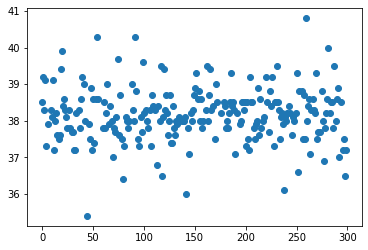

In [38]:
colic_df['Rectal temperature'].plot(style = 'o')

Честно говоря, я не могу назвать какие-то значения температуры явными выбросами, по крайней мере верхние. С учетом, что при серьезных проблемах со здоровьем температура склонна к повышению, а у лошади она и так на 1-2 гр выше, чем у человека, предельное значение в 40+ но меньшее 41 не является чем-то аномальным. Из интереса загуглил и выяснил, что таки да, температура лошади вполне может быть и 40.5 при болезни и даже чуть выше. ТАк что сверху у нас особо выбросов нет.  
Снизу имеем какое-то аномальное значение около 35, но гугл показал, что она может падать аж до 34, так что будем считать, что тут все без проблем. 

<AxesSubplot:>

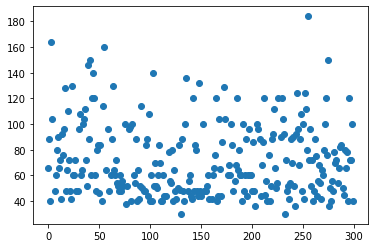

In [39]:
colic_df['Pulse'].plot(style = 'o')

Дальше все, по сути, аналогично и уныло. Строим бегло график, выбираем предельные точки, лезем в гугл и выясняем, что у больной лошади такое вполне может встречатся, забиваем.

<AxesSubplot:>

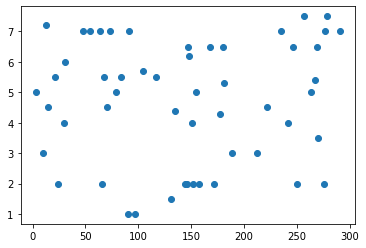

In [40]:
colic_df['Nasogastric reflux PH'].plot(style = 'o')

С PH все интересно - очень четкое разделение на норму, легкое отклонение от нормы и довольно тяжелое, причем в обе стороны. Но, опять таки с учетом того, что все лошади у нас больны желудком, а некоторые вплоть до операции - такие значения выбросами считать нельзя, тем более, что их там довольно много и они реально на одних линиях (если брать предельные).  
Было бы странно, если бы при тяжелых проблемах с желудком с кислотностью все было хорошо.

In [49]:
# Ну и наконец, пропуски. Самое больное место
# Это, конечно, дикая игра в угадайку (особенно с учетом, что жэто медицинские данные) в комбинации 
# с логической игрой "заполни пропуски", для ну хоть как-то адекватного их заполнения надо учесть 
# кучу параметров в стиле "если тяжелое вздутие живота и холодные конечности
# то нужна хирургия" и тп. Принцип мне понятен, но, честно говоря, глубоко в это
# укапываться было довольно скучно
# Позаменяем все в меру понимания и пока не станет совсем лениво и бессмысленно

colic_df['Surgery'].fillna('No', inplace=True)
colic_df['Rectal temperature'].fillna(colic_df['Rectal temperature'].mean(), inplace=True)
colic_df['Pulse'].fillna(colic_mode['Pulse'][0], inplace=True)
colic_df['Respiratory rate'].fillna(colic_df['Respiratory rate'].median(axis=0), inplace=True)
colic_df['Nasogastric reflux PH'].fillna(colic_mode['Nasogastric reflux PH'][0], inplace=True)
colic_df['Temperature of extremities'].fillna('Cool', inplace=True)
colic_df['Peripheral pulse'].fillna('Normal', inplace=True)
colic_df['Capillary refill time'].fillna('Normal', inplace=True)
colic_df['Pain'].fillna('Mild pain', inplace=True)
colic_df['Peristalsis'].fillna('Hypomotile', inplace=True)
colic_df['Abdominal distension'].fillna('Normal', inplace=True)
colic_df['Nasogastric tube'].fillna('Slight', inplace=True)
colic_df['Nasogastric reflux'].fillna('Slight', inplace=True)
colic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hospital Number             300 non-null    int64  
 1   Age                         300 non-null    object 
 2   Surgery                     300 non-null    object 
 3   Rectal temperature          300 non-null    float64
 4   Pulse                       300 non-null    float64
 5   Respiratory rate            300 non-null    float64
 6   Nasogastric reflux PH       300 non-null    float64
 7   Temperature of extremities  300 non-null    object 
 8   Peripheral pulse            300 non-null    object 
 9   Mucous membranes            253 non-null    object 
 10  Capillary refill time       300 non-null    object 
 11  Pain                        300 non-null    object 
 12  Peristalsis                 300 non-null    object 
 13  Abdominal distension        300 non